# Heart Disease - Random Forest

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [195]:
# Importing the dataset
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [196]:
X = df.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [197]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
clf = RandomForestClassifier()

#default hyperparamaters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [200]:
#Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify = y)

In [201]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [202]:
#Make a prediction
y_pred = clf.predict(X_test)

In [203]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [204]:
y_test

179    0
197    0
285    0
194    0
188    0
      ..
14     1
4      1
224    0
202    0
12     1
Name: target, Length: 61, dtype: int64

In [205]:
# Evaluate the model
clf.score(X_train, y_train)*100

100.0

In [206]:
clf.score(X_test, y_test)*100

81.9672131147541

In [207]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm, accuracy_score as acc

In [208]:
 print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



In [209]:
print(cm(y_test,y_pred))

[[18 10]
 [ 1 32]]


In [210]:
print(acc(y_test, y_pred))

0.819672131147541


In [211]:
# Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...") 
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on the test set: {clf.score(X_test,y_test)*100:2f}%")

Trying model with 10 estimators...
Model accuracy on the test set: 75.409836%
Trying model with 20 estimators...
Model accuracy on the test set: 80.327869%
Trying model with 30 estimators...
Model accuracy on the test set: 80.327869%
Trying model with 40 estimators...
Model accuracy on the test set: 81.967213%
Trying model with 50 estimators...
Model accuracy on the test set: 77.049180%
Trying model with 60 estimators...
Model accuracy on the test set: 83.606557%
Trying model with 70 estimators...
Model accuracy on the test set: 80.327869%
Trying model with 80 estimators...
Model accuracy on the test set: 81.967213%
Trying model with 90 estimators...
Model accuracy on the test set: 83.606557%


In [212]:
#Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [213]:
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))

In [214]:
loaded_model.score(X_test,y_test)

0.8360655737704918

# Experimenting with different Classification Models

* LinearSVC
* KNeighborsClassifier (or KNN)
* SVC (or Support Vector Machine)
* LogisticRegression


In [215]:
#Importing required libraries
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [216]:
#Creating dictionary for all the models which we are imported

models = {"LinearSVC": LinearSVC(),
          "KNN" : KNeighborsClassifier(),
          "SVC" : SVC(),
          "LogisticRegression" : LogisticRegression(),
          "RandomForestClassifier" : RandomForestClassifier()
         }
results = {}

In [217]:
np.random.seed(42)
for model_name, model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test,y_test)
    
results

{'LinearSVC': 0.819672131147541,
 'KNN': 0.5901639344262295,
 'SVC': 0.6557377049180327,
 'LogisticRegression': 0.8032786885245902,
 'RandomForestClassifier': 0.8360655737704918}

In [218]:
results_df = pd.DataFrame(results.values(), results.keys(),columns=["Accuracy"])
results_df

,Accuracy
LinearSVC,0.819672
KNN,0.590164
SVC,0.655738
LogisticRegression,0.803279
RandomForestClassifier,0.836066


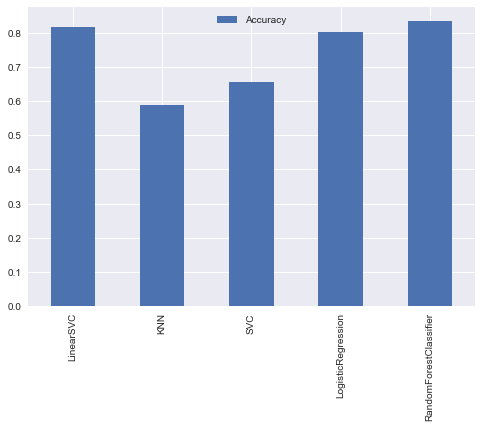

In [219]:
plt.style.use('seaborn')
results_df.plot.bar();

# Hyperparameter Tuning

In [220]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [221]:
log_reg_grd = {"C" : np.logspace(-4,4,20),
              "solver" : ["liblinear"]}

In [225]:
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grd,
                               cv=5,
                               n_iter=5,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [226]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [227]:
rs_log_reg.score(X_test,y_test)

0.8032786885245902

In [228]:
clf = LogisticRegression(solver='liblinear', C=29.763514416313132)
clf.fit(X_test,y_test)

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [230]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

In [231]:
y_pred = clf.predict(X_test)

In [232]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[24,  4],
       [ 2, 31]], dtype=int64)

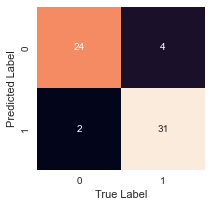

In [233]:
#plotting confusion matrix
import seaborn as sns

def plot_conf_mat(y_test,y_pred):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test,y_pred);

In [234]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



* __Precision__ - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* __Recall__ - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* __F1 score__ - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* __Support__ - The number of samples each metric was calculated on.
* __Accuracy__ - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* __Macro avg__ - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* __Weighted avg__ - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [235]:
precision_score(y_test,y_pred)

0.8857142857142857

In [236]:
recall_score(y_test,y_pred)

0.9393939393939394

In [237]:
f1_score(y_test,y_pred)

0.9117647058823529

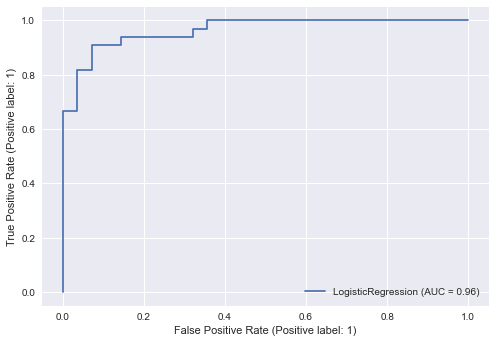

In [239]:
plot_roc_curve(clf,X_test,y_test);

In [242]:
from sklearn.model_selection import cross_val_score as cvs

In [243]:
cvs(clf,X,y,scoring='accuracy',cv=5)

array([0.81967213, 0.8852459 , 0.83606557, 0.86666667, 0.75      ])

In [244]:
#cross validation accuracy
cross_val_acc = np.mean(cvs(clf,X,y,cv=5,scoring='accuracy'))
cross_val_acc

0.8315300546448089

In [245]:
#cross validation precision
cross_val_prec = np.mean(cvs(clf,X,y,cv=5,scoring='precision'))
cross_val_prec

0.8214092741066426

In [246]:
#cross validation recall
cross_val_rec = np.mean(cvs(clf,X,y,cv=5,scoring='recall'))
cross_val_rec

0.8909090909090909

In [247]:
#cross validation f1-score
cross_val_f1 = np.mean(cvs(clf,X,y,cv=5,scoring='f1'))
cross_val_f1

0.8532195593974488

In [248]:
from joblib import dump, load
dump(clf,"trained-classifier.joblib")

['trained-classifier.joblib']

In [249]:
loaded_clf = load("trained-classifier.joblib")


In [250]:
loaded_clf.score(X_test,y_test)

0.9016393442622951

In [251]:
clf.score(X_test,y_test)

0.9016393442622951